# Find the best accommodation for students in any other city of your choice by classifying accommodation for incoming students on the basis of their preferences on amenities, budget and proximity to the location

In the fast-moving, effort-intense environment that the average person inhabits, It's a frequent occurrence that one is too tired to fix oneself a home-cooked meal. And of course, even if one gets home-cooked meals every day, it is not unusual to want to go out for a good meal every once in a while for social/recreational purposes. Either way, it's a commonly understood idea that regardless of where one lives, the food one eats is an important aspect of the lifestyle one leads.
<br>


Now, imagine a scenario where a person has newly moved into a new location. They already have certain preferences, certain tastes. It would save both the student and the food providers a lot of hassle if the student lived close to their preferred outlets. Convenience means better sales, and saved time for the customer.
<br>

Food delivery apps aside, managers of restaurant chains and hotels can also leverage this information. For example, if a manager of a restaurant already knows the demographic of his current customers, they'd ideally want to open at a location where this demographic is at its highest concentration, ensuring short commute times to the location and more customers served.If potential hotel locations are being evaluated, a site that caters to a wide variety of tastes would be ideal, since one would want every guest to have something to their liking.

Student responses in the dataset are numerically encoded, to get reference to the actual answers, refer to the file <a target="_blank" href="./codebook_food.docx">Codebook food docs</a>

## Install required libraries for data analysis

In [1]:
!pip install pandas numpy matplotlib seaborn sklearn requests folium --quiet

## Import the libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import os
import requests,json
from sklearn.cluster import KMeans
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

import folium # plotting library
from folium import plugins

# style of plots
plt.style.use('seaborn-whitegrid')

# show all rows in the data set
pd.set_option('display.max_rows', None)

# Data Cleaning

## Set filepath to access data

In [3]:
path = "food_coded.csv" # name of the dataset
base_path = os.getcwd() # get current directory
file_path = os.path.join(base_path,path) # merge the paths
file_path

'/home/dibyamohan/EDA_Geolocation/food_coded.csv'

## Read the csv file


In [4]:
student_data = pd.read_csv(file_path) # read data from csv to dataframe
student_data

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190
5,2.25,1,1,610,3.0,980.0,2,"Candy, brownies and soda.","None, i don't eat comfort food. I just eat whe...",4.0,...,1.0,2.0,4,940.0,345,None.,1,2,1315,190
6,3.8,2,1,610,3.0,420.0,2,"Chocolate, ice cream, french fries, pretzels","stress, boredom",1.0,...,1.0,1.0,5,940.0,690,soccer,4,1,1315,180
7,3.3,1,1,720,3.0,420.0,1,"Ice cream, cheeseburgers, chips.",I eat comfort food when im stressed out from s...,1.0,...,1.0,2.0,1,725.0,500,none,4,2,1315,137
8,3.3,1,1,430,NaN,420.0,1,"Donuts, ice cream, chips",Boredom,2.0,...,2.0,2.0,5,725.0,345,none,3,2,760,180
9,3.3,1,1,430,3.0,315.0,2,"Mac and cheese, chocolate, and pasta","Stress, anger and sadness",1.0,...,1.0,1.0,4,580.0,345,field hockey,5,1,900,125


## Filter the columns which are needed for analysis

There are around 61 parameters to choose from. However, we need only those which are relevant to the result we are looking for

In [5]:
food_choices = student_data.loc[:, ["cook","eating_out","employment","ethnic_food","exercise","fruit_day","income","on_off_campus","pay_meal_out","sports","veggies_day"]]
food_choices

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4
5,3.0,1,3.0,4,2.0,2,1.0,1.0,5,2.0,1
6,2.0,2,3.0,5,1.0,4,4.0,2.0,2,1.0,4
7,3.0,2,2.0,2,2.0,5,5.0,1.0,5,2.0,4
8,3.0,5,2.0,5,NaN,4,5.0,1.0,3,2.0,3
9,3.0,3,3.0,5,1.0,5,4.0,1.0,3,1.0,5


## Find the columns having at least one NaN value
Find all the columns with missing data and handle them

In [6]:
nan_values = food_choices.isna() # returns boolean values for every column 
nan_columns = nan_values.any() # checks if any column is true
columns_with_nan = food_choices.columns[nan_columns].tolist() # filter true values and convert to list
columns_with_nan 

['cook', 'employment', 'exercise', 'income', 'on_off_campus', 'sports']

## Replace each NaN value with the average value of that column

#### Other methods to replace NaN values
- Use the ‘most frequent’ value from each column
- Use ‘interpolation’ in each column (df.interpolate) - more computative
- K-nearest neighbour (Impute new values from neighbouring values) using KNNImputer

KNN algorithms are helpful for large datasets

In [7]:
for col in columns_with_nan:
    mean_value = food_choices[col].mean(skipna=True) # find avearage skipping NaN values
    food_choices[col].fillna(float(round(mean_value)),inplace=True) # replace each missing NaN with the average of its column
food_choices

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4
5,3.0,1,3.0,4,2.0,2,1.0,1.0,5,2.0,1
6,2.0,2,3.0,5,1.0,4,4.0,2.0,2,1.0,4
7,3.0,2,2.0,2,2.0,5,5.0,1.0,5,2.0,4
8,3.0,5,2.0,5,2.0,4,5.0,1.0,3,2.0,3
9,3.0,3,3.0,5,1.0,5,4.0,1.0,3,1.0,5


# Data Visualisation and Exploration

<img src="./boxplot.png" alt="Box plot Demo" align="left" width="600px">

## Box Plot
It can tell us at glance where the population is concentrated, and how the outliers compare to the average object in the group

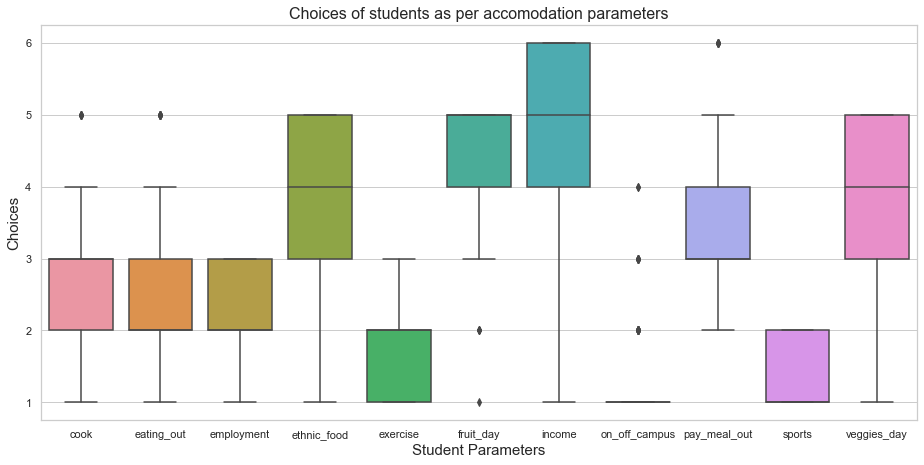

In [8]:
sns.set(style="whitegrid",rc={'figure.figsize':(15.7,7.27)})# set plot size
sns.boxplot(x="variable",y="value", data=pd.melt(food_choices)) # prepare to plot
plt.xlabel("Student Parameters", fontsize= 15) # set labels
plt.ylabel("Choices", fontsize= 15)
plt.title("Choices of students as per accomodation parameters", fontsize= 16)
plt.show() # display box plot

# Run K-means Clustering on the data
K Means Clustering will help us group locations based on the amenities located around them. For example, a location with a high amount of shops nearby will be labeled "Amenity Rich" while a location with less amenities will be labeled "Amenity Poor". Similar locations will be grouped (clustered) together.

<blockquote>Note: Here, we are applying K means first on the dataset of the general population, which will help us organise the population into groups. Further down the line, we will apply K means again on a different dataset.</blockquote>

### Properties of clusters
- All the data points in a cluster should be similar to each other. <br>
- The data points from different clusters should be as different as possible.

### Evaluation matrix for clustering
#### Inertia (Works for first property)
Inertia calculates the sum of distances of all the points within a cluster from the centroid of that cluster. <br>Hence, the distance between them should be as low as possible.
#### Dunn Index (Works for second property)
This distance between the centroids of two different clusters is known as inter-cluster distance.
<br>
Dunn Index = min(Inter cluster distance) / max(Intra cluster distance)
<br>The more the value of the Dunn index, the better will be the clusters.
#### Steps of K-means clustering
1. Choose the number of clusters k
2. Select k random points from the data as centroids
3. Assign all the points to the closest cluster centroid
4. Recompute the centroids of newly formed clusters
5. Repeat steps 3 and 4
<br>

### Stopping Criteria
1. Centroids of newly formed clusters do not change
2. Points remain in the same cluster
3. Maximum number of iterations are reached


## Challenges with the K-Means Clustering Algorithm
- The size of clusters is different
- when the densities of the original points are different

We randomly initialize the centroids in k-means clustering. This is also potentially problematic because we might get different clusters every time. So, to solve this problem of random initialization, there is an algorithm called K-Means++ that can be used to choose the initial values, or the initial cluster centroids, for K-Means.

## K-Means++ to Choose Initial Cluster Centroids for K-Means Clustering
It specifies a procedure to initialize the cluster centers before moving forward with the standard k-means clustering algorithm.

1. The first cluster is chosen uniformly at random from the data points that we want to cluster. This is similar to what we do in K-Means, but instead of randomly picking all the centroids, we just pick one centroid here
2. Next, we compute the distance (D(x)) of each data point (x) from the cluster center that has already been chosen
3. Then, choose the new cluster center from the data points with the probability of x being proportional to (D(x))^2. The next centroid will be the one whose squared distance (D(x)2) is the farthest from the current centroid.
4. We then repeat steps 2 and 3 until k clusters have been chosen
<br>

We can continue with the K-Means algorithm after initializing the centroids. Using K-Means++ to initialize the centroids tends to improve the clusters. Although it is computationally costly relative to random initialization, subsequent K-Means often converge more rapidly.

## How to Choose the Right Number of Clusters in K-Means Clustering?
One thing we can do is plot a graph, also known as an elbow curve, where the x-axis will represent the number of clusters and the y-axis will be an evaluation metric.
- The cluster value where this decrease in inertia value becomes constant can be chosen as the right cluster value for our data.
- You must also look at the computation cost while deciding the number of clusters. Increase the number of clusters, the computation cost will also increase. 

In [9]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(food_choices)

KMeans(n_clusters=2)

In [10]:
kmeans.inertia_

1080.4133333333334

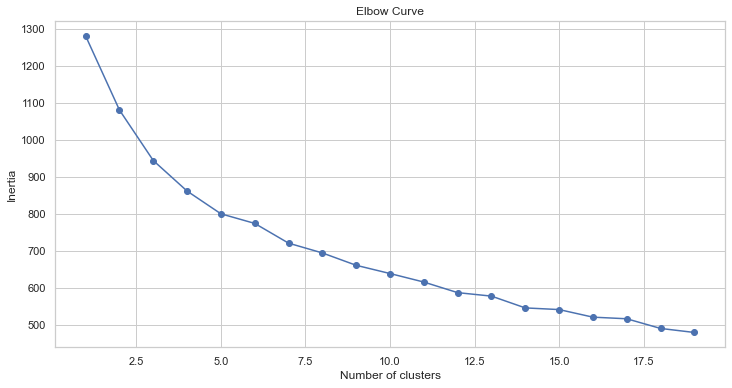

In [11]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(food_choices)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("Elbow Curve")
plt.show()

## We can choose any number of clusters between 5 to 8. Let's choose out k to be 6

In [12]:
# k means using 6 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 6, init='k-means++')
kmeans.fit(food_choices)
pred = kmeans.predict(food_choices)

# let’s look at the value count of points in each of the above-formed clusters:
frame = pd.DataFrame(food_choices)
frame['cluster'] = pred
frame['cluster'].value_counts()

3    33
1    22
2    21
0    19
4    15
5    15
Name: cluster, dtype: int64

## Frequency distribution of clusters

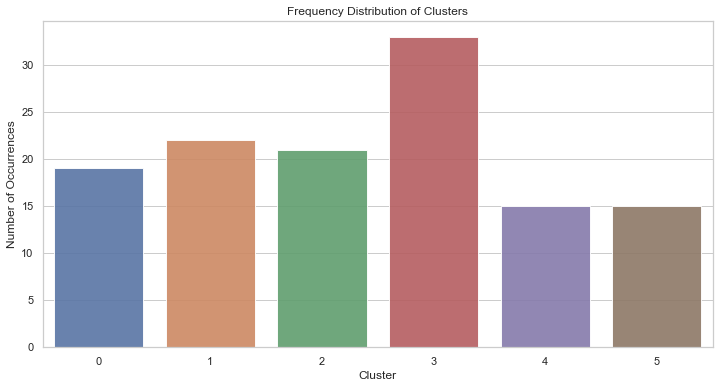

In [13]:
carrier_count = frame['cluster'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Clusters')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Cluster', fontsize=12)
plt.show()

## Relation between income and Dining out

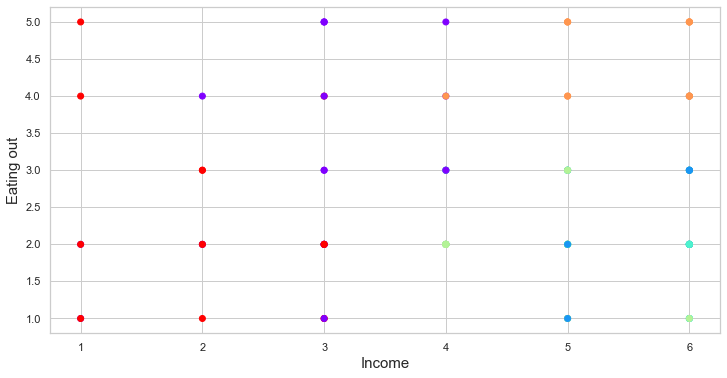

In [14]:
sns.set(style="whitegrid",rc={'figure.figsize':(10.7,5.27)})
plt.figure(figsize=(12,6))
plt.scatter(food_choices["income"],food_choices["eating_out"],c=pred, cmap="rainbow")
plt.xlabel("Income", fontsize= 15) # set labels
plt.ylabel("Eating out", fontsize= 15)
plt.show()

# Get Geolocational Data from Foursquare API

## Get data of all residential areas near the target location within 20km radius

In [15]:
# api url
url = 'https://api.foursquare.com/v2/venues/search'

# additional headaers
params = dict(
client_id ='ZXWW30Y5AHXHPNHWX0YK0JSHIGG2RLRM3RTMNRA5ZPYFH0EW',
client_secret ='DVNNODYNSSVNQF3GJ0AJ0UH2ACDS2AJW0TR131Z05ZZAAJYH',
ll ='13.133521,77.567135',
radius = "10000",
v = '20180323',
categoryId = ['4e67e38e036454776db1fb3a','4d4b7105d754a06372d81259'] , # for residential areas and colleges
limit="50",
)

# received response
resp = requests.get(url=url, params=params)
# convert to json
data = json.loads(resp.text)

# if data present
if 'venues' in data['response']:
    residence_json_data = data["response"]["venues"]
else:
    residence_json_data = []
    print("Venues not found! Please try another location")

# process JSON data and get the required parameters only
processed_residence_json_data = []
for item in residence_json_data:
    data_dict = {}
    # set keys as per required data
    data_dict['id'] = item.get("id",None)
    data_dict['location_lat'] = str(item.get('location').get('lat',""))
    data_dict['location_lng'] = str(item.get('location').get('lng',"")) 
    data_dict['location_address'] = item.get('location').get('address',None)
    data_dict['location_cc'] = item.get('location').get('cc',None)
    data_dict['location_city'] = item.get('location').get('city',None)
    data_dict['location_country'] = item.get('location').get('country',None)
    data_dict['location_crossStreet'] = item.get('location').get('crossStreet',None)
    processed_residence_json_data.append(data_dict)
    
processed_residence_json_data

[{'id': '53ec5948498e6c9591d3295f',
  'location_lat': '13.133722305297852',
  'location_lng': '77.56761169433594',
  'location_address': None,
  'location_cc': 'IN',
  'location_city': None,
  'location_country': 'India',
  'location_crossStreet': None},
 {'id': '4be91d804485d13abf1e94ee',
  'location_lat': '13.034692154982425',
  'location_lng': '77.53489624969835',
  'location_address': 'Watch Factory Road, Peenya',
  'location_cc': 'IN',
  'location_city': 'Bangalore',
  'location_country': 'India',
  'location_crossStreet': None},
 {'id': '50f64beee4b0e8bab94e11f6',
  'location_lat': '13.129600381309784',
  'location_lng': '77.58760027384302',
  'location_address': None,
  'location_cc': 'IN',
  'location_city': None,
  'location_country': 'India',
  'location_crossStreet': None},
 {'id': '4ce37479ef2db60c22c5c05b',
  'location_lat': '13.032404743921173',
  'location_lng': '77.52360820770264',
  'location_address': '#23/24,II Phase',
  'location_cc': 'IN',
  'location_city': 'Banga

## Arrange JSON data in a dataframe
Here, None(NaN) values doesn't concern us because we are taking only id, latitude and longitude into consideration

In [16]:
# covert json to a dataframe
residence_df = pd.DataFrame(processed_residence_json_data)
# remove duplicates
residence_df = residence_df.drop_duplicates(subset='id', keep="first")
residence_df

,id,location_lat,location_lng,location_address,location_cc,location_city,location_country,location_crossStreet
0,53ec5948498e6c9591d3295f,13.133722305297852,77.56761169433594,None,IN,None,India,None
1,4be91d804485d13abf1e94ee,13.034692154982425,77.53489624969835,"Watch Factory Road, Peenya",IN,Bangalore,India,None
2,50f64beee4b0e8bab94e11f6,13.129600381309784,77.58760027384302,None,IN,None,India,None
3,4ce37479ef2db60c22c5c05b,13.032404743921173,77.52360820770264,"#23/24,II Phase",IN,Bangalore,India,Peenya Industrial Area
4,519dadea498e461cde3744ef,13.154293060302734,77.50236511230469,Hesaraghatta,IN,None,India,None
5,517f77dfe4b005243493e603,13.114189649269747,77.63506224156873,None,IN,None,India,None
6,51120ae5e4b05196400fa9a3,13.068144,77.609253,None,IN,Bangalore,India,None
7,539899a0498e0f88a0f0127f,13.0345865902306,77.53488366943306,None,IN,None,India,None
8,4f4de151e4b0629e7afb0051,13.03555466889093,77.58960366997754,None,IN,None,India,None
9,4f4c6491e4b05b49b3a097cc,13.036295504189695,77.58995621925273,None,IN,None,India,None


### We also need a count of grocery stores, restaurants, gyms etc. around each residential location. Form another query to get all these locations (fixed in a short distance around each residential location = 1000 meters) and hit the endpoint again.

In [17]:
category_list = [
    ('restaurants',["4d4b7105d754a06374d81259"]),# for restaurants
    ('fruits_vegetables_groceries',["4bf58dd8d48988d1f9941735","52f2ab2ebcbc57f1066b8b1c"]),# for grocery, fruits and vegetable
    ('gym_fitness_centers',["4f4528bc4b90abdf24c9de85"]),# for gym and fitness centers
]

# api url
url = 'https://api.foursquare.com/v2/venues/search'

# count all categories at specified location and display
amenities_data = []

for item in processed_residence_json_data:
    data_dict = {}
    data_dict["lat"] = item.get("location_lat", None)
    data_dict["lng"] = item.get("location_lng", None)
    for ctg in category_list:
        params = dict(
            client_id ='ZXWW30Y5AHXHPNHWX0YK0JSHIGG2RLRM3RTMNRA5ZPYFH0EW',
            client_secret ='DVNNODYNSSVNQF3GJ0AJ0UH2ACDS2AJW0TR131Z05ZZAAJYH',
            ll= item["location_lat"] + "," + item["location_lng"],
            categoryId = ctg[1], # category_id 
            radius="1000",
            v='20180323',
        )
        resp_txt = requests.get(url=url, params=params)
        # convert to json
        data_tmp = json.loads(resp_txt.text)
        data_dict[ctg[0]] = len(data_tmp.get("response", []).get("venues",[]))
    amenities_data.append(data_dict)
amenities_data
    

[{'lat': '13.133722305297852',
  'lng': '77.56761169433594',
  'restaurants': 10,
  'fruits_vegetables_groceries': 0,
  'gym_fitness_centers': 0},
 {'lat': '13.034692154982425',
  'lng': '77.53489624969835',
  'restaurants': 23,
  'fruits_vegetables_groceries': 1,
  'gym_fitness_centers': 0},
 {'lat': '13.129600381309784',
  'lng': '77.58760027384302',
  'restaurants': 6,
  'fruits_vegetables_groceries': 0,
  'gym_fitness_centers': 2},
 {'lat': '13.032404743921173',
  'lng': '77.52360820770264',
  'restaurants': 27,
  'fruits_vegetables_groceries': 0,
  'gym_fitness_centers': 0},
 {'lat': '13.154293060302734',
  'lng': '77.50236511230469',
  'restaurants': 0,
  'fruits_vegetables_groceries': 0,
  'gym_fitness_centers': 0},
 {'lat': '13.114189649269747',
  'lng': '77.63506224156873',
  'restaurants': 5,
  'fruits_vegetables_groceries': 0,
  'gym_fitness_centers': 1},
 {'lat': '13.068144',
  'lng': '77.609253',
  'restaurants': 10,
  'fruits_vegetables_groceries': 1,
  'gym_fitness_cente

## Get the processed data in a dataframe

In [22]:
amenities_df = pd.DataFrame(amenities_data)

# Plot the clustered locations on a map


## Run K-Means clustering on the data using k found before

In [23]:
# k means using 6 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 6, init='k-means++')
kmeans.fit(amenities_df)
pred = kmeans.predict(amenities_df)

# let’s look at the value count of points in each of the above-formed clusters:
frame = pd.DataFrame(amenities_df)
frame['cluster'] = pred
print(frame['cluster'].value_counts())
frame

1    13
3    12
4    10
5     7
2     4
0     2
Name: cluster, dtype: int64


,lat,lng,restaurants,fruits_vegetables_groceries,gym_fitness_centers,cluster
0,13.133722305297852,77.56761169433594,10,0,0,1
1,13.034692154982425,77.53489624969835,23,1,0,4
2,13.129600381309784,77.58760027384302,6,0,2,3
3,13.032404743921173,77.52360820770264,27,0,0,4
4,13.154293060302734,77.50236511230469,0,0,0,3
5,13.114189649269747,77.63506224156873,5,0,1,3
6,13.068144,77.609253,10,1,3,1
7,13.0345865902306,77.53488366943306,23,1,0,4
8,13.03555466889093,77.58960366997754,28,11,5,5
9,13.036295504189695,77.58995621925273,28,10,4,5


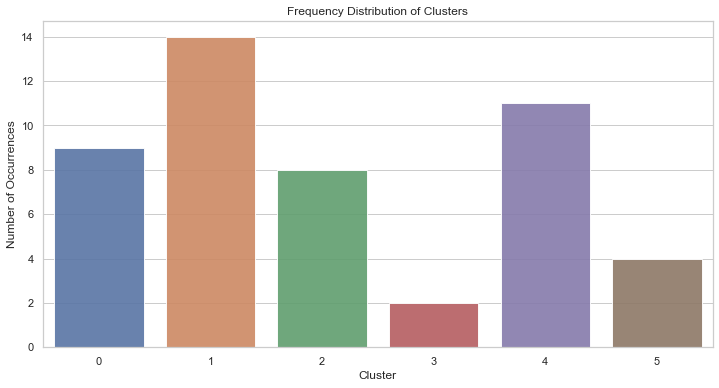

In [20]:
carrier_count = frame['cluster'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Clusters')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Cluster', fontsize=12)
plt.show()

## Show the clusters in the map

In [24]:
latitude = '13.133521'
longitude = '77.567135'
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
rainbow = ["red","blue","green","black","brown","orange"]

# add markers to the map
markers_colors = []
for lat, lng, cluster, food, groceries, gym in zip(frame['lat'], frame['lng'], frame['cluster'], frame['restaurants'],frame['fruits_vegetables_groceries'],frame['gym_fitness_centers']):
    folium.vector_layers.CircleMarker([lat, lng], radius=6, tooltip = str(food)+ ','+str(groceries) + ',' + str(gym) +' - Cluster ' + str(cluster),
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters


# Insights from data - Case Study

### What sort of person will live in what cluster? Are there any particular criteria/demographics that go well together?

#### Cluster 0 and 5 (Red and Yellow Dots)
- More the restaurants in an area, more will be the gyms and fitness centers. (Cluster 0)
- Major markets and shops are closer to cluster 0
- High income groups live around cluster 0

#### Cluster 1 and 2 (Green and Blue Dots)
- Foodies should consider cluster 1 and 2, if they don't want gym freaks around them
- Cluster 1 and 2 are budget-friendly dining-out options on weekends
- Suitable for both high and low income groups

#### Cluster 3 (Black Dots)
- Cluster 3 are posh areas with less restaurants and some gyms. But, you have to travel some distance to go to markets
- Since, these areas are far from markets, they are cheaper to live
- Suitable for average income groups

#### Cluster 4 (Brown/Maroon Dots)
- No gyms/fitness centers, all you do is eat, eat and eat